# Pizza Retail Store Analysis

[Maven Pizza Data ](https://www.mavenanalytics.io/data-playground)


In [3]:
import pandas as pd
import numpy as np
order_details=pd.read_csv("C:/Users/Xavier/Desktop/pizza_sales/order_details.csv", delimiter=',').copy()
orders_data=pd.read_csv("C:/Users/Xavier/Desktop/pizza_sales/orders.csv", delimiter=',').copy()
#Pizza_types has a diifferent encoding than others 
pizza_types=pd.read_csv("C:/Users/Xavier/Desktop/pizza_sales/pizza_types.csv", delimiter=',', encoding='cp1252').copy()
pizza_data=pd.read_csv("C:/Users/Xavier/Desktop/pizza_sales/pizzas.csv", delimiter=',').copy()

Imported the datasets of the Pizza Store and previewed.

In [53]:
display(order_details.head(1),
     orders_data.head(1),
     pizza_types.head(1),
     pizza_data.head(1))

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1


,order_id,date,time
0,1,2015-01-01,11:38:36


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75


Checked for missing data in all datasets with the following script:

In [50]:
for i in [order_details, orders_data, pizza_types,pizza_data]:
    tot_null=i.isnull().any().sum()
    if tot_null < 1:
        print('No missing data')
    else:
        print(tot_null)


No missing data
No missing data
No missing data
No missing data


Thus, no missing data in all datasets.

Joined the orders_data and order_details tables wih the following script:

In [9]:
orders_info=pd.merge(orders_data, order_details, on='order_id', how='inner')
orders_info.head(1)

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1


I combine date and time columns into a single column with the following scipt:

In [10]:
#combine time and dates field
order_dates=orders_info['date']
order_time=orders_info['time']
date_time= order_dates + ' ' + order_time

# replace date field with date_time series and delete time columns
orders_info=orders_info.drop('time',axis=1)
orders_info['date']=date_time

#renamed column
orders_info.rename(columns = {'date': 'date_time'}, inplace=True)
orders_info.head(1)

,order_id,date,order_details_id,pizza_id,quantity
0,1,2015-01-01 11:38:36,1,hawaiian_m,1
1,2,2015-01-01 11:57:40,2,classic_dlx_m,1


Wrote a script to obtain new dataset showing total quantity for each date_time period.  
Also converted it to a csv file for further analysis in Tableau.

In [56]:
#grouped dataset
orders_dataset=orders_info[['date_time', 'quantity']].groupby([ 'date_time']).sum()
#preview
display(orders_dataset.head())

#exported as csv
orders_dataset.to_csv('order_dataset2.csv')

,quantity
date_time,
2015-01-01 11:38:36,1
2015-01-01 11:57:40,5
2015-01-01 12:12:28,2
2015-01-01 12:16:31,1
2015-01-01 12:21:30,1


In [58]:
#Got rid of the ingredients column
pizza_types=pizza_types.drop('ingredients', axis=1)

In [59]:
pizza_types.head()

,pizza_type_id,name,category
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken
1,cali_ckn,The California Chicken Pizza,Chicken
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken
3,ckn_pesto,The Chicken Pesto Pizza,Chicken
4,southw_ckn,The Southwest Chicken Pizza,Chicken


In [63]:
#Joined datasets
order_price=pd.merge(orders_info, pizza_data, how='inner', on='pizza_id')
order_price.head()

,order_id,date_time,order_details_id,pizza_id,quantity,pizza_type_id,size,price
0,1,2015-01-01 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25
1,77,2015-01-02 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25
2,146,2015-01-03 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25
3,163,2015-01-03 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25
4,247,2015-01-04 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25


Exported the dataset as csv for further visualization in Tableau

In [60]:
order_price.to_csv('order_price.csv')

Picture of Dashboard is shown below. Tableau was the visualization tool.  
For better view and interaction with dashboard, please click [Pizza Dashboard](https://www.mavenanalytics.io/data-playground).

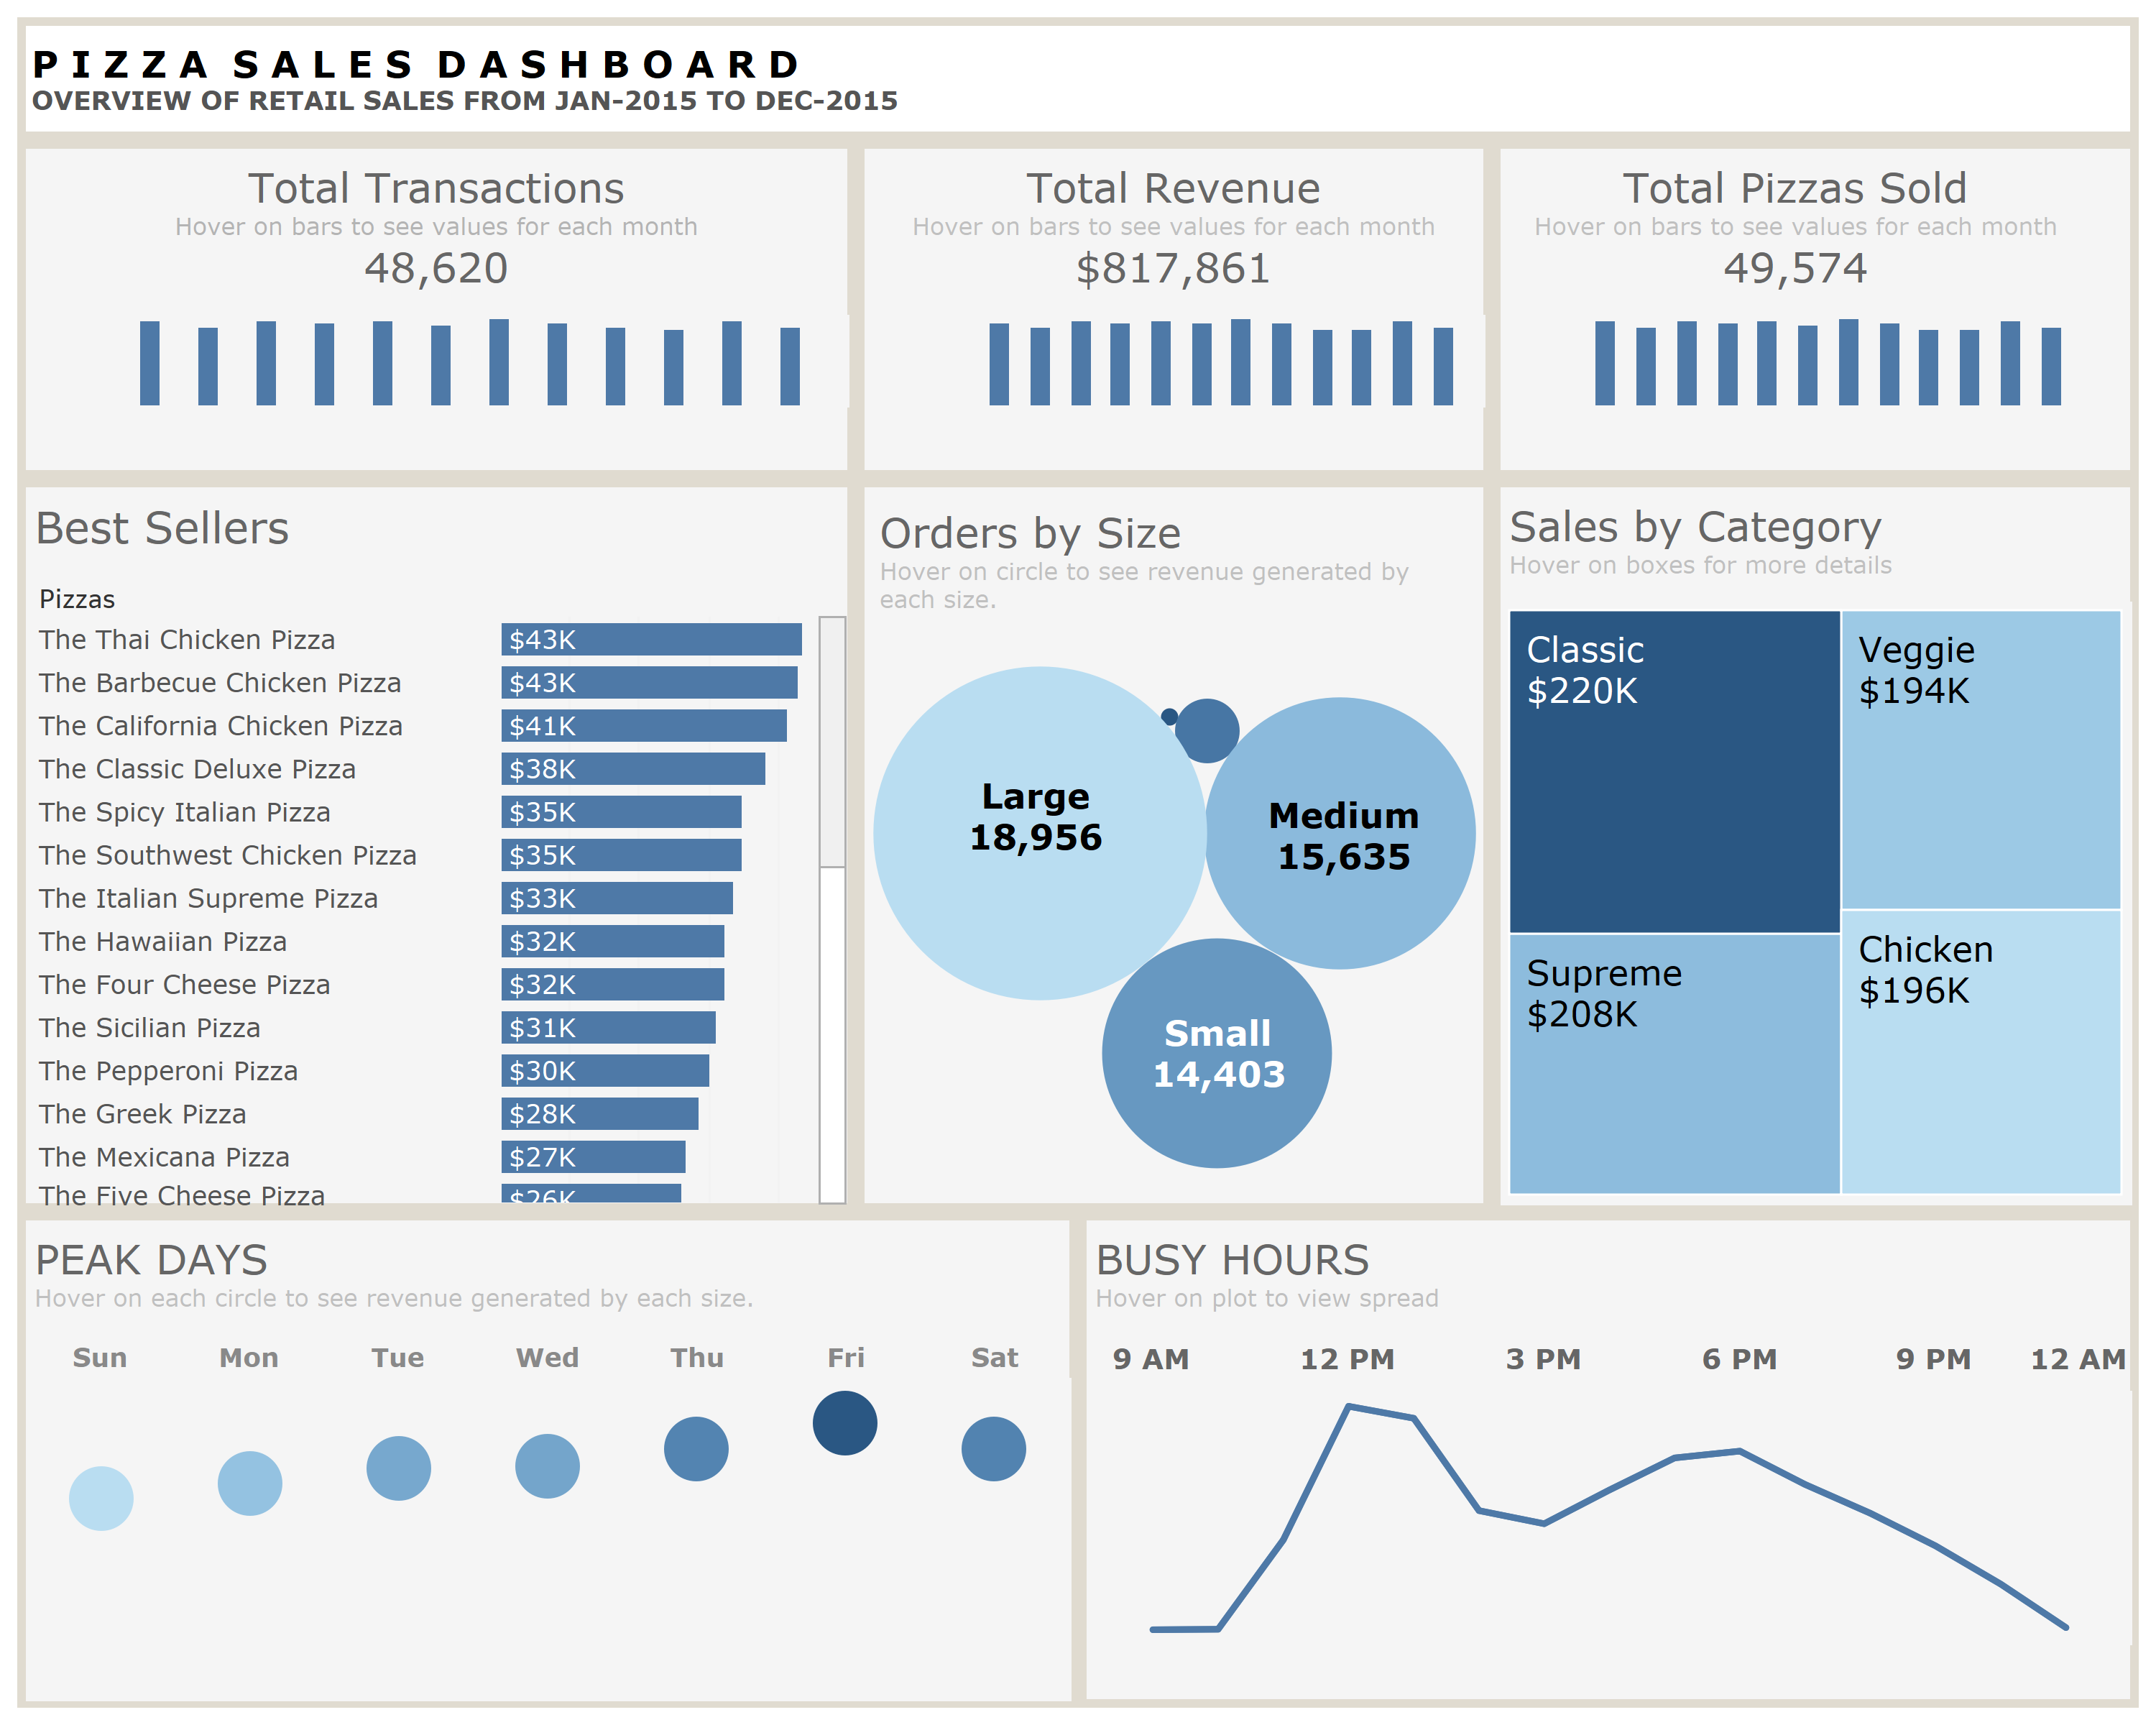

In [62]:
from IPython.display import Image
Image(filename='C:/Users/Xavier/Documents/New_folder/Pizza_Dashboard.png')
